$${\huge{Exercise- Linear Regression}}$$

# <font color=blue> Correlation within Iris data set attributes(features). We are not using the target in this exercise.
   
    
<font size=4> We consider the [Iris data set from scikit learn](https://scikit-learn.org/1.5/datasets/toy_dataset.html)


In [17]:
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [18]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [14]:
#print(iris.DESCR)

<font size=4 color =blue> __Change iris.data into a  dataframe using iris.feature_names as the columns label.__    

In [19]:
import pandas as pd
feat=pd.DataFrame(iris.data,columns =iris.feature_names)
feat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<font size=4 color =blue> __Find the Correlation Matrix for the Data Frame and tell me what two features are most correlated__ 

In [20]:
feat.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<font size =4 color=bown> __Answer:Petal Length and Width__

<font size=4 color =blue> __Use Scikit learn to do a linear regression for X=petal length and y= petal width.__ 
* Graph the line along with the data ( use l0=np.linspace(0,8, 100) to generate the points you predict on)
* Print  the coefficients of the regression model
    
<font color =red> You may  have the most luck using the array iris.data.  Also you need to reshape from (150,) to (150,1) 

In [21]:
reg=linear_model.LinearRegression()

In [26]:
X=iris.data[:,2] #this is going to produce an error when you try to graph and it is going to tell you to reshape
y=iris.data[:,3]

X.shape

(150,)

In [28]:
X=iris.data[:,2].reshape(-1,1)
y=iris.data[:,3].reshape(-1,1)

X.shape

(150, 1)

-0.3630755213190304 0.41575541635241187


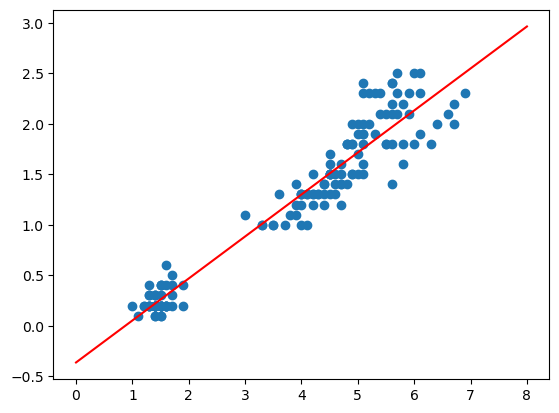

In [29]:
reg.fit (X,y)
a=reg.intercept_[0]
b=reg.coef_[0][0]
l0=np.linspace(0, 8, 100)
plt.plot(l0, reg.predict(l0.reshape(-1,1)), "r")
plt.scatter(X,y)
print(a,b)

<font size=4 color=blue>__Use this to predict what the   petal width will be if the petal length is 3__

In [24]:
reg.predict([[3]])

array([[0.88419073]])

<font size=4 color=blue>__What is the $R^2$?__ 

In [25]:
#reg.score - R**2 is going to be the default. 
reg.score(X,y)

0.9271098389904927

<font size=4 color=blue>__Repeat for  a quadratic fit. Plot and compare.__

In [36]:
poly_f=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_f.fit_transform(X) #very important. 
reg.fit(X_poly,y)
print("Quadratic fit",reg.score(X_poly,y))
reg.intercept_,reg.coef_

Quadratic fit 0.9271679557444837


(array([-0.38678103]), array([[ 0.43383349, -0.00256892]]))

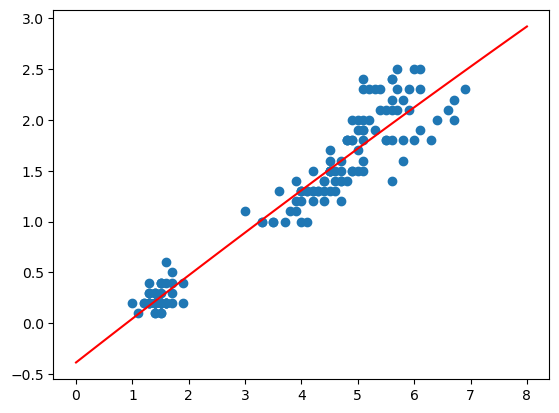

In [38]:
l0=np.linspace(0,8, 100)
l1=l0.reshape(-1,1)
L1=poly_f.fit_transform(l1) 
plt.plot(l1, reg.predict(L1), "r")
plt.scatter(X,y)

<font size=4 color=blue>__Why does it look so similar to the linear fit?__ 

<font size =4 color=bown> __Answer:X**2 COEF is near 0__

In [39]:
z = poly_f.transform([[3]])
reg.predict(z),z

(array([[0.89159913]]), array([[3., 9.]]))

<font size=4 color=blue>__What about a polynomial of degree 4? Plot and compare.__  

In [49]:
poly_f=PolynomialFeatures(degree=4,include_bias=False)
X_poly=poly_f.fit_transform(X)
reg.fit(X_poly,y)
print("degree4 fit",reg.score(X_poly,y))
reg.intercept_,reg.coef_

degree4 fit 0.9373432006856652


(array([-0.46158868]),
 array([[ 0.82110549, -0.34324572,  0.08944371, -0.00714685]]))

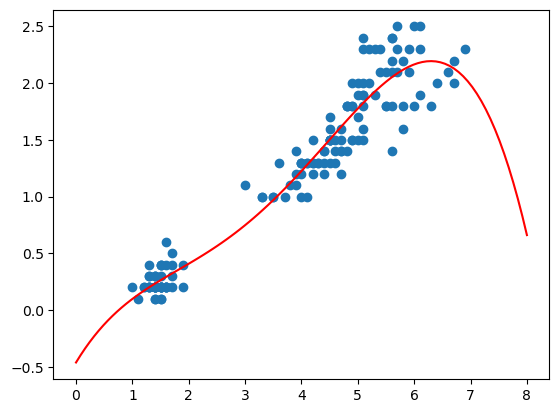

In [53]:
l0=np.linspace(0,8, 100)
l1=l0.reshape(-1,1)
L1=poly_f.fit_transform(l1) 
plt.plot(l1, reg.predict(L1), "r")
plt.scatter(X,y)

<font size=4 color=blue>__Just looking at the graph do you like the fourth degree polynomial better?__  

<font size=4 color =brown> __Answer: No, it is overfitting__ 

<font size=4 color=blue>__What issue do all the models have for petal lengths close to .5 ?__  

<font size=4 color =brown> __Answer: They are negative, which is impossible__ 